In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

In [3]:
model_resnet = ResNet50()

In [4]:
model_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
image_path = 'C:/Users/DELL/Downloads/New folder/download.jpeg'

In [6]:
img = image.load_img(image_path, target_size=(224, 224))

<function matplotlib.pyplot.show(close=None, block=None)>

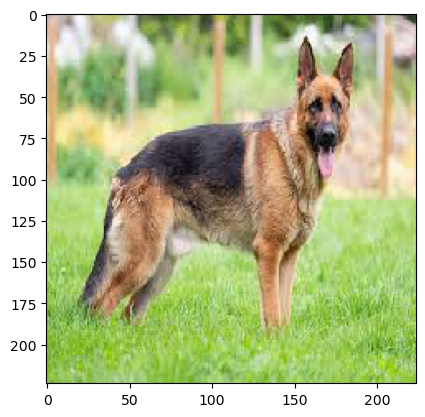

In [7]:
plt.imshow(img)
plt.show

In [8]:
img = image.img_to_array(img)

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(224, 224, 3)

In [11]:
img = np.expand_dims(img, axis = 0)

In [12]:
img.shape

(1, 224, 224, 3)

In [13]:
pred = model_resnet.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [14]:
np.argmax(pred)

225

In [15]:
tf.keras.applications.resnet.decode_predictions(pred)[0]

[('n02105162', 'malinois', 0.8446777),
 ('n02097209', 'standard_schnauzer', 0.07019625),
 ('n02106662', 'German_shepherd', 0.02487931),
 ('n02091467', 'Norwegian_elkhound', 0.018001206),
 ('n02097130', 'giant_schnauzer', 0.011639676)]

In [16]:
img.shape

(1, 224, 224, 3)

In [17]:
img = preprocess_input(img)

In [18]:
pred = model_resnet.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [19]:
np.argmax(pred)

235

In [20]:
tf.keras.applications.resnet.decode_predictions(pred)[0]

[('n02106662', 'German_shepherd', 0.9878057),
 ('n02105162', 'malinois', 0.009668677),
 ('n02105251', 'briard', 0.0007081927),
 ('n02105412', 'kelpie', 0.00030860613),
 ('n02111129', 'Leonberg', 0.00029646026)]

In [21]:
img.shape

(1, 224, 224, 3)

In [22]:
 img = img.reshape((224, 224, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


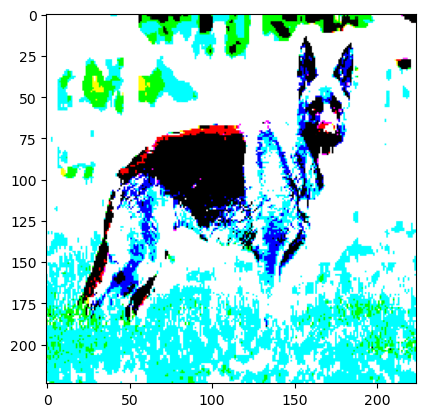

In [23]:
plt.imshow(img)
plt.show()